In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
import seaborn as sns
import glob
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import itertools
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
!python -m spacy download el_core_news_sm

In [3]:
nlp = spacy.load('el_core_news_sm')

In [4]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [5]:
kath = pd.read_csv('/content/kathimerini_full_articles.csv')
avgi = pd.read_csv('/content/avgi_full_articles.csv')
it = pd.read_csv('/content/newsit_full_articles.csv')
skai = pd.read_csv('/content/skai_full_articles.csv')
vima = pd.read_csv('/content/tovima_full_articles.csv')
efsyn = pd.read_csv('/content/efsyn_full_articles.csv')

In [6]:
all = pd.concat([kath, skai, it, vima, efsyn, avgi], axis=0)

In [7]:
all.to_csv('/content/all.csv', index=False)

In [8]:
all = pd.read_csv('/content/all.csv')

In [9]:
all.drop('section', inplace=True, axis=1)

In [10]:
all.drop('author', inplace=True, axis=1)

In [12]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

In [22]:
emolex = emolex_df.drop_duplicates(subset=['word'])
emolex = emolex_df.dropna()
emolex.reset_index(inplace = True, drop=True)

In [15]:
alls = all[['full_text', 'site']]

In [16]:
alls = alls.rename(columns={'full_text': 'text'} )

In [17]:
alls = alls.rename(columns={'site': 'ιστοσελίδα'} )

In [18]:
alls = alls.replace(np.nan, '0')

In [23]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(alls['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

In [25]:
positive_words = emolex[emolex.Positive == 1]['word']

negative_words = emolex[emolex.Negative == 1]['word']

angry_words = emolex[emolex.Anger == 1]['word']

anticipation_words = emolex[emolex.Anticipation == 1]['word']

disgust_words = emolex[emolex.Disgust == 1]['word']

fear_words = emolex[emolex.Fear == 1]['word']

joy_words = emolex[emolex.Joy == 1]['word']

sadness_words = emolex[emolex.Sadness == 1]['word']

surprise_words = emolex[emolex.Surprise == 1]['word']

trust_words = emolex[emolex.Trust == 1]['word']

In [26]:
alls['anger'] = wordcount_df[angry_words].sum(axis=1)

alls['positive'] = wordcount_df[positive_words].sum(axis=1)

alls['joy'] = wordcount_df[joy_words].sum(axis=1)

alls['disgust'] = wordcount_df[disgust_words].sum(axis=1)

alls['surprise'] = wordcount_df[surprise_words].sum(axis=1)

alls['trust'] = wordcount_df[trust_words].sum(axis=1)

alls['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

alls['sadness'] = wordcount_df[sadness_words].sum(axis=1)

alls['negative'] = wordcount_df[negative_words].sum(axis=1)

alls['fear'] = wordcount_df[fear_words].sum(axis=1)

In [27]:
alls.reset_index(inplace=True)
alls.set_index('ιστοσελίδα', inplace=True)
alls

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
ιστοσελίδα,,,,,,,,,,,,
kathimerini.gr,0,Οι ενδείξεις που συνδέουν το κόμμα-έκπληξη των...,2,21,6,2,6,17,9,1,12,8
kathimerini.gr,1,Ο δράστης αρχικά πλησίασε τον Κόντε αφήνοντας ...,4,0,0,3,0,2,0,3,4,3
kathimerini.gr,2,Πρόκειται για μέλος της πολιτικής δυναστείας τ...,1,6,0,2,0,4,1,0,0,0
kathimerini.gr,3,Δύναται να υποστηριχθεί ότι οι αντιεμβολιαστές...,14,21,7,10,5,18,9,2,18,1
kathimerini.gr,4,Facebook και Instagram αδυνατούν να εξαλείψουν...,4,11,4,4,2,6,3,5,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...
avgi.gr,776,Νωρίτερα αυτή την εβδομάδα οι γερμανικές αρχές...,5,11,5,4,5,10,7,9,12,7
avgi.gr,777,Οι αρχές της Αυστραλίας αναμένεται να καταστήσ...,7,10,1,4,1,6,5,5,15,7
avgi.gr,778,"Φαίνεται πως, μολονότι πολλές ασθένειες έχουν ...",22,62,10,27,5,32,26,17,41,25


In [28]:
plt.style.use('seaborn-v0_8-darkgrid')

In [30]:
alls['(-)αρνητικότητα | θετικότητα(+)'] = alls.positive*100//alls[['positive','negative']].sum(axis=1) - alls.negative*100//alls[['positive','negative']].sum(axis=1)

<Axes: xlabel='ιστοσελίδα'>

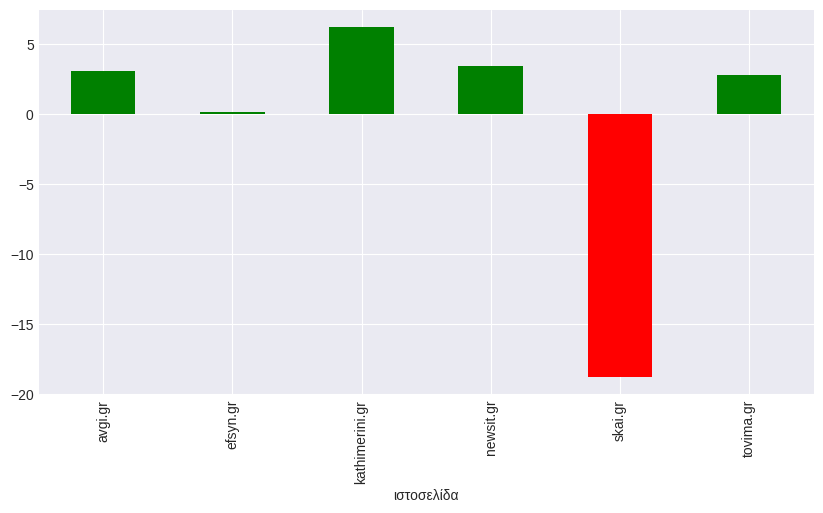

In [33]:
alls['(-)αρνητικότητα | θετικότητα(+)'].groupby(by=alls.index).mean().plot(kind='bar',color=('green', 'green', 'green', 'green', 'red','green'), figsize=(10,5))

In [34]:
alls['φόβος'] = alls.fear*100//alls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [35]:
alls['θυμός'] = alls.anger*100//alls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [36]:
alls['αηδία'] = alls.disgust*100//alls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [37]:
alls['λύπη'] = alls.sadness*100//alls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [38]:
alls['χαρά'] = alls.joy*100//alls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [39]:
alls['εμπιστοσύνη'] = alls.trust*100//alls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [40]:
alls['έκπληξη'] = alls.surprise*100//alls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [41]:
alls['προσδοκία'] = alls.anticipation*100//alls[['fear', 'joy', 'disgust', 'anger', 'sadness', 'anticipation', 'trust', 'surprise']].sum(axis=1)

In [42]:
alls['απέχθεια'] = alls['αηδία'] + alls['θυμός']

In [43]:
alls['απελπισία'] = alls['λύπη'] + alls['φόβος']

In [44]:
alls['ανησυχία'] = alls['προσδοκία'] + alls['φόβος']

In [45]:
alls['επιθετικότητα'] = alls['προσδοκία'] + alls['θυμός']

In [46]:
alls['ντροπή'] = alls['φόβος'] + alls['αηδία']

In [47]:
alls

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,...,λύπη,χαρά,εμπιστοσύνη,έκπληξη,προσδοκία,απέχθεια,απελπισία,ανησυχία,επιθετικότητα,ντροπή
ιστοσελίδα,,,,,,,,,,,,,,,,,,,,,
kathimerini.gr,0,Οι ενδείξεις που συνδέουν το κόμμα-έκπληξη των...,2,21,6,2,6,17,9,1,...,1.0,11.0,33.0,11.0,17.0,6.0,16.0,32.0,20.0,18.0
kathimerini.gr,1,Ο δράστης αρχικά πλησίασε τον Κόντε αφήνοντας ...,4,0,0,3,0,2,0,3,...,20.0,0.0,13.0,0.0,0.0,46.0,40.0,20.0,26.0,40.0
kathimerini.gr,2,Πρόκειται για μέλος της πολιτικής δυναστείας τ...,1,6,0,2,0,4,1,0,...,0.0,0.0,50.0,0.0,12.0,37.0,0.0,12.0,24.0,25.0
kathimerini.gr,3,Δύναται να υποστηριχθεί ότι οι αντιεμβολιαστές...,14,21,7,10,5,18,9,2,...,3.0,10.0,27.0,7.0,13.0,36.0,4.0,14.0,34.0,16.0
kathimerini.gr,4,Facebook και Instagram αδυνατούν να εξαλείψουν...,4,11,4,4,2,6,3,5,...,15.0,12.0,18.0,6.0,9.0,24.0,30.0,24.0,21.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avgi.gr,776,Νωρίτερα αυτή την εβδομάδα οι γερμανικές αρχές...,5,11,5,4,5,10,7,9,...,17.0,9.0,19.0,9.0,13.0,16.0,30.0,26.0,22.0,20.0
avgi.gr,777,Οι αρχές της Αυστραλίας αναμένεται να καταστήσ...,7,10,1,4,1,6,5,5,...,13.0,2.0,16.0,2.0,13.0,30.0,32.0,32.0,32.0,30.0
avgi.gr,778,"Φαίνεται πως, μολονότι πολλές ασθένειες έχουν ...",22,62,10,27,5,32,26,17,...,10.0,6.0,19.0,3.0,15.0,29.0,25.0,30.0,28.0,31.0


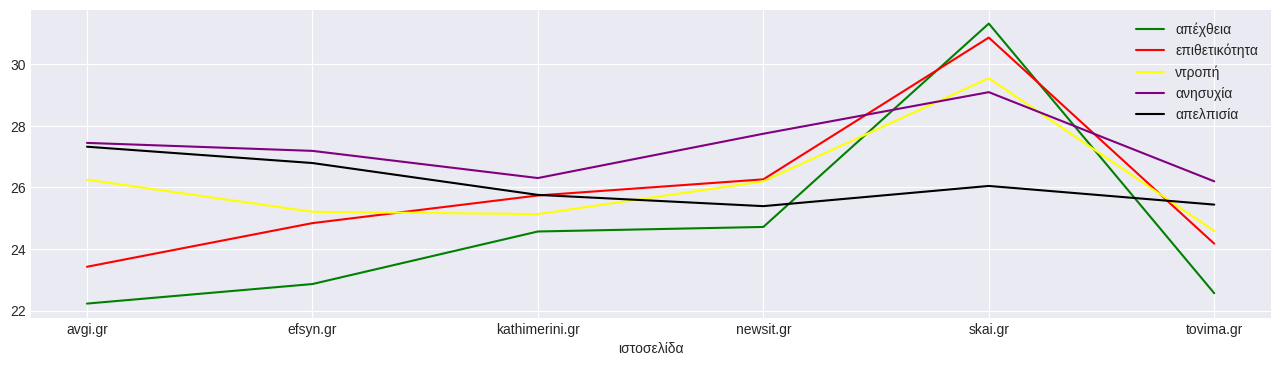

In [48]:
ax = alls['απέχθεια'].groupby(by=alls.index).mean().plot(figsize=(16,4), label = 'απέχθεια', color = 'green')
alls['επιθετικότητα'].groupby(by=alls.index).mean().plot(figsize=(16,4), label = 'επιθετικότητα', color = 'red')
alls['ντροπή'].groupby(by=alls.index).mean().plot(figsize=(16,4), label = 'ντροπή', color = 'yellow')
alls['ανησυχία'].groupby(by=alls.index).mean().plot(figsize=(16,4), label = 'ανησυχία', color = 'purple')
alls['απελπισία'].groupby(by=alls.index).mean().plot(figsize=(16,4), label = 'απελπισία', color = 'black').legend()